In [3]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
image_size = [224,224]
WIDTH = 151
HEIGHT = 136
BATCH_SIZE = 32
train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Test'

In [5]:
resnet50 = ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)


94765736/94765736 [==============================] - 1s 0us/step


In [6]:
for layer in resnet50.layers:
    layer.trainable = False


In [8]:

from keras.layers import Dense, Flatten
from keras.models import Sequential, Model
x = Flatten()(resnet50.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=resnet50.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
import tensorflow as tf
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            directory=train_path,
            shuffle=True,
            image_size=(WIDTH,HEIGHT),
            batch_size = BATCH_SIZE,
)

Found 416 files belonging to 2 classes.


In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Train',
                                                target_size = (224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 416 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [13]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
13/13 [==============================] - 135s 10s/step - loss: 3.9431 - accuracy: 0.4808 - val_loss: 3.2081 - val_accuracy: 0.3209
Epoch 2/10
13/13 [==============================] - 104s 8s/step - loss: 1.4401 - accuracy: 0.5601 - val_loss: 0.6493 - val_accuracy: 0.6791
Epoch 3/10
13/13 [==============================] - 109s 8s/step - loss: 0.8935 - accuracy: 0.5433 - val_loss: 0.5960 - val_accuracy: 0.6940
Epoch 4/10
13/13 [==============================] - 114s 9s/step - loss: 0.7720 - accuracy: 0.5697 - val_loss: 1.7368 - val_accuracy: 0.3358
Epoch 5/10
13/13 [==============================] - 110s 9s/step - loss: 0.9537 - accuracy: 0.4976 - val_loss: 0.5318 - val_accuracy: 0.7463
Epoch 6/10
13/13 [==============================] - 114s 9s/step - loss: 0.7100 - accuracy: 0.6202 - val_loss: 1.5012 - val_accuracy: 0.3507
Epoch 7/10
13/13 [==============================] - 110s 9s/step - loss: 0.7322 - accuracy: 0.5865 - val_loss: 1.2288 - val_accuracy: 0.3657
Epoch 8/10
1

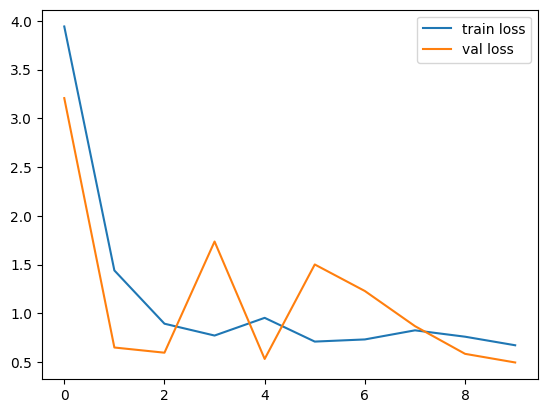

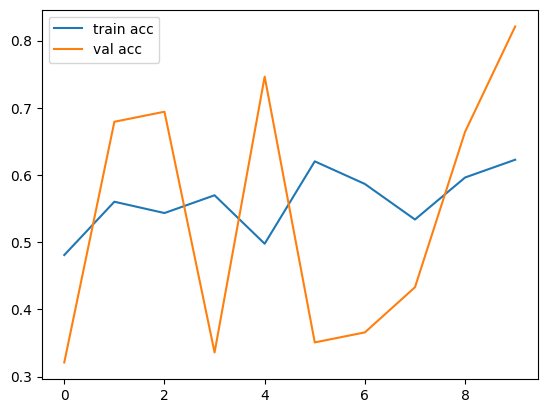

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
model.save('malaria_model.h5')

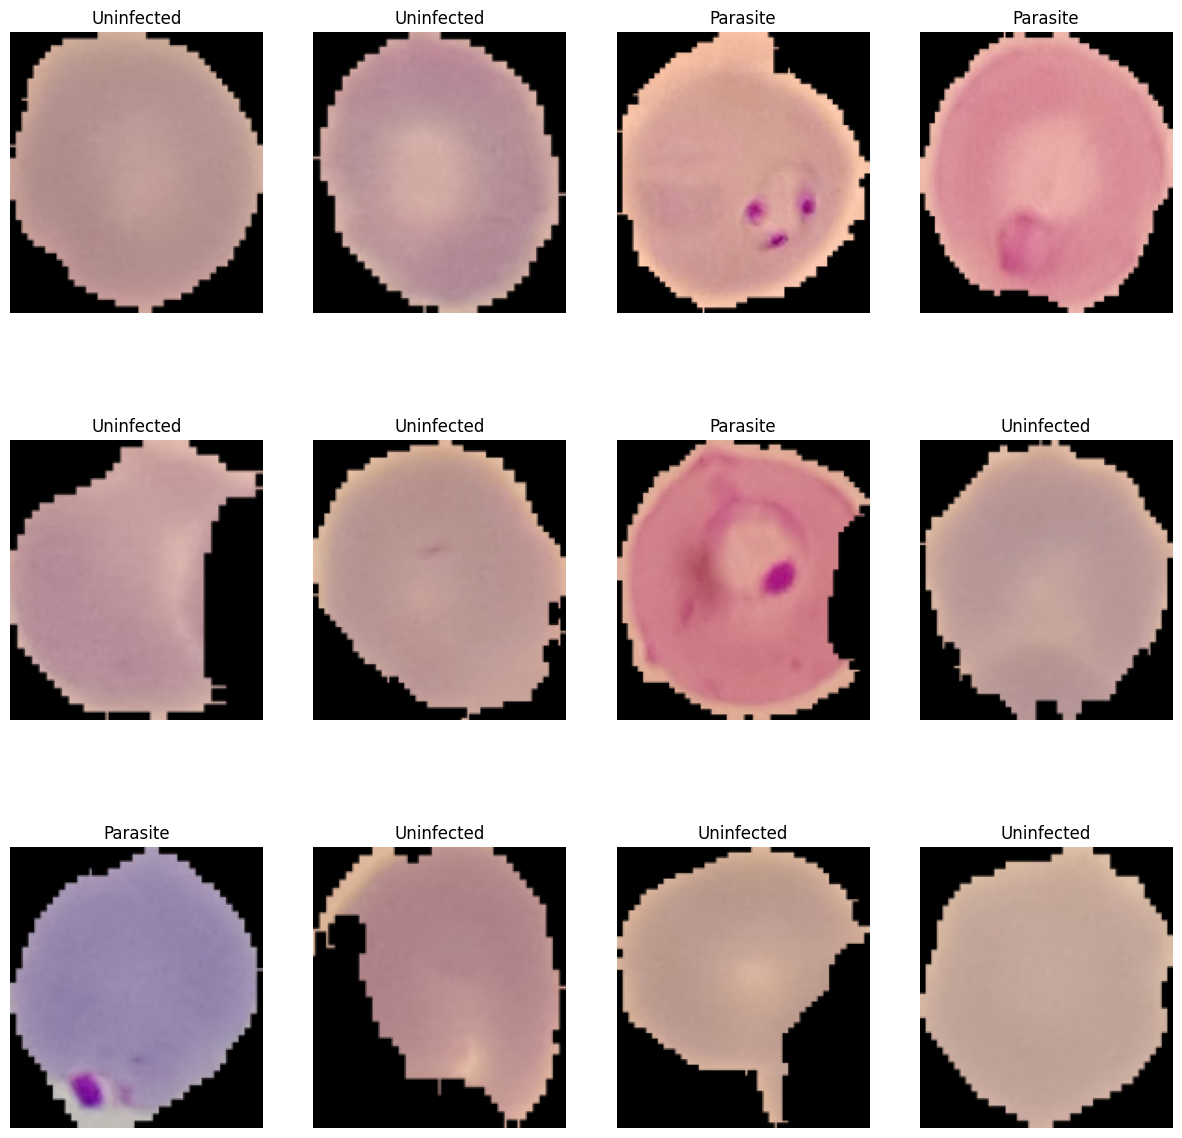

In [ ]:
classnames = train_dataset.class_names
classnames
plt.figure(figsize = (15,15))
for image, label in train_dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classnames[label[i]])
        plt.axis('off')